In [1]:
#Binary Classification Problem

# Infidelity - Sheila de Montaigne
Question - Can I predict if one will have an affair.
If so, then identify which attirbues/characteristics are the most important.

Findings: 
I can predict whether someone will have an affair with 74% accuracy. 
Top features - how happy in marriage, how religious, level of education, and age.

In [2]:
import pandas as pd #makes data frames possible

In [3]:
import numpy as np #helps with data munging

In [4]:
import matplotlib.pyplot as plt #more powerful graphs

In [5]:
import matplotlib.pyplot as plt #more powerful graphs

In [6]:
import os

In [7]:
#Geting the current working directory
os.getcwd()

'/Users/sheilatupker/Desktop/ML_Infidelity_Project'

In [8]:
import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#Import models from scikit learn module:
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn import model_selection

/Users/sheilatupker/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
#Dataset:
#http://koaning.io/fun-datasets.html
#many people write this as df= and not data=  
#df stands for the data frame that panda puts data into

#Data Set Reference:
#http://fairmodel.econ.yale.edu/rayfair/pdf/1978A200.PDF
#data = pd.read_csv('/Users/sheilatupker/Desktop/ML_Infidelity_Project/affairs.csv')
data = pd.read_csv(r'affairs.csv')


Getting to Know Data


In [10]:
data.head()#gives the first 5 records of the dataset 

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


In [11]:
data.tail() #gives the last five records of the dataset

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
596,male,22.0,1.5,yes,1,12,2,5,1
597,female,32.0,10.0,yes,2,18,5,4,7
598,male,32.0,10.0,yes,2,17,6,5,2
599,male,22.0,7.0,yes,3,18,6,2,2
600,female,32.0,15.0,yes,3,14,1,5,1


In [12]:
#Gives summary of numerical values 
#mostly categorical data so look at binary categories which will tell me more then some of the
#other attributes. This type of summary is always better for continious data however
#things can be garnered from it for discrete data (like my data).
data.describe() #the 5 number statistical summary

,age,ym,religious,education,occupation,rate,nbaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,1.455907
std,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,3.298758
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


In [13]:
data.shape #quick and dirty dataset dimensions


(601, 9)

In [14]:
#Gives the number of columns and rows
#601 rows and 9 columns
data.info

<bound method DataFrame.info of         sex   age     ym child  religious  education  occupation  rate  \
0      male  37.0  10.00    no          3         18           7     4   
1    female  27.0   4.00    no          4         14           6     4   
2    female  32.0  15.00   yes          1         12           1     4   
3      male  57.0  15.00   yes          5         18           6     5   
4      male  22.0   0.75    no          2         17           6     3   
5    female  32.0   1.50    no          2         17           5     5   
6    female  22.0   0.75    no          2         12           1     3   
7      male  57.0  15.00   yes          2         14           4     4   
8    female  32.0  15.00   yes          4         16           1     2   
9      male  22.0   1.50    no          4         14           4     5   
10     male  37.0  15.00   yes          2         20           7     2   
11     male  27.0   4.00   yes          4         18           6     4   
12    

# Now testing out the some different ways to find Null values


In [15]:
data.isnull().head() #shows whether each value is null or not
#used head to keep nbr of records to five

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [16]:
data.isnull().values #shows same as above but in array so more succinct

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [17]:
data.isnull().any() #same as above but more succinct (by column)- perhaps my most preferred

sex           False
age           False
ym            False
child         False
religious     False
education     False
occupation    False
rate          False
nbaffairs     False
dtype: bool

In [18]:
#Finds the null values the most succinct way, returning one value
#No null values
data.isnull().values.any()

False

# Distribution Analysis With A Visual Focus

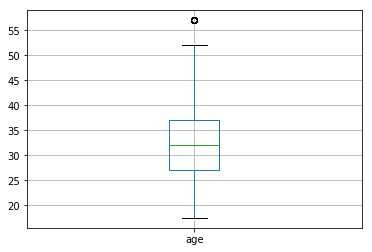

In [19]:
#Boxplot of age variable
#A good way to see outliers and easily see and mark quartiles
data.boxplot(column='age')

In [20]:
#checking for outliers
#Finds max as we are looking for the outlier from above
#57 is not really an outlier so it will keep it in the data set
max(data['age'])

57.0

In [21]:
#Find unique values in the age var
#make sure all the data is good and included in the original experiment
data.age.unique()

array([37. , 27. , 32. , 57. , 22. , 47. , 42. , 52. , 17.5])

In [22]:
max(data.age.unique()) #just checking another way - just to try out and test
#another method

57.0

In [23]:
#years married
data.ym.unique()

array([10.   ,  4.   , 15.   ,  0.75 ,  1.5  ,  7.   ,  0.417,  0.125])

#Boxplot of years married variable
data.boxplot(column='ym')

In [24]:
#I decided on keeping the 0.125 age variable
#even though it is an outlier it should be included in this dataset
#there is no reason not to include a newly married couple

A histogram divides the number line into equal intervals and shows how many values fall into each interval. A boxplot divides the data into four equal parts and shows what part of the number line is covered by each portion of the data. From a boxplot, you can see the five-number summary exactly and outliers are clearly marked. These must be estimated from a histogram and can be difficult to estimate. From a histogram, you can estimate the mean by estimating a balance point for the distribution. You cannot do this with a boxplot. A histogram will reveal the frequency of the data within an interval. You do not know the exact values, but you know how many are within the given boundaries. You know a lower and upper bound but not necessarily the exact least and greatest value. You know where there are clusters of data and where there are gaps. With a boxplot, you get a sense of the basic shape of the distribution, but you cannot see clusters or gaps

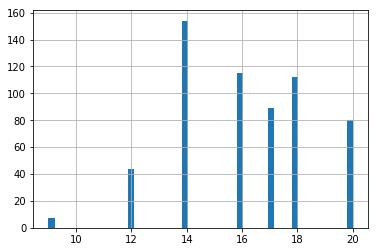

In [25]:
#Histogram of education variable
#it seems that most people have education
data['education'].hist(bins=50)

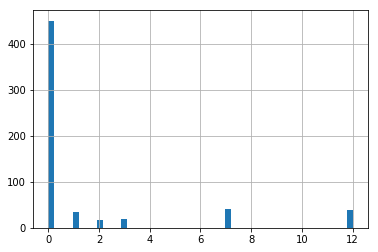

In [26]:
#Histogram of number of affairs variable
data['nbaffairs'].hist(bins=50)

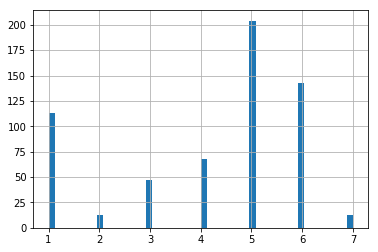

In [27]:
#Histogram of occupation variable
data['occupation'].hist(bins=50)

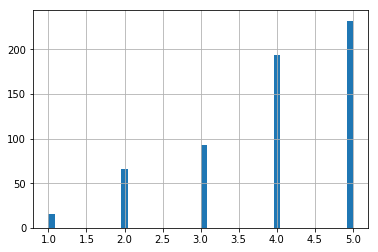

In [28]:
#Histogram of rate of happiness variable
data['rate'].hist(bins=50)

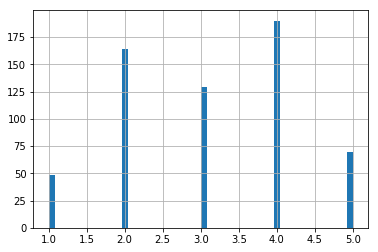

In [29]:
#Histogram of relgiousness variable
data['religious'].hist(bins=50)

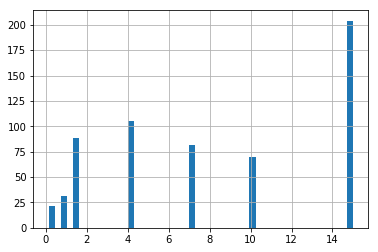

In [30]:
#Histogram of years married variable
data['ym'].hist(bins=50)

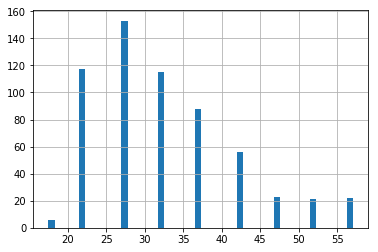

In [31]:
#Histogram of age variable
data['age'].hist(bins=50)

In [32]:
#The number of affairs
data.nbaffairs.unique()

array([ 0,  3,  7, 12,  1,  2])

In [33]:
#Creates column affair for yes or no / zero or one
#Added this var so I would know whether an affair was had or not
#irregardless of number of times. 
data['affair'] = 0

In [34]:
#append this newly created var to each record in the dataset

#Create a temp list
tempAffair = []

#For each row in the column,
for row in data['nbaffairs']:
    #if !=0 then a 1 gets assigned
    if row !=0:
        #append a 1
        tempAffair.append(1)
    #otherwise it gets a 0
    else:
        tempAffair.append(0)

#Creates a column from the list
data['affair'] = tempAffair
        


In [35]:
#checking to see if newly appended var of affair is there and it is - yay!
data.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,affair
0,male,37.0,10.00,no,3,18,7,4,0,0
1,female,27.0,4.00,no,4,14,6,4,0,0
2,female,32.0,15.00,yes,1,12,1,4,0,0
3,male,57.0,15.00,yes,5,18,6,5,0,0
4,male,22.0,0.75,no,2,17,6,3,0,0


In [36]:
#checking the tail as well, just for good measure
data.tail()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,affair
596,male,22.0,1.5,yes,1,12,2,5,1,1
597,female,32.0,10.0,yes,2,18,5,4,7,1
598,male,32.0,10.0,yes,2,17,6,5,2,1
599,male,22.0,7.0,yes,3,18,6,2,2,1
600,female,32.0,15.0,yes,3,14,1,5,1,1


In [37]:
#dropping nbaffairs bc based 'affair' on this field so out it goes
data = data.drop('nbaffairs', axis=1)
data.head()

,sex,age,ym,child,religious,education,occupation,rate,affair
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


In [38]:
data['religious'].value_counts()

4    190
2    164
3    129
5     70
1     48
Name: religious, dtype: int64

In [39]:
data['education'].value_counts()

14    154
16    115
18    112
17     89
20     80
12     44
9       7
Name: education, dtype: int64

In [40]:
data['rate'].value_counts()

5    232
4    194
3     93
2     66
1     16
Name: rate, dtype: int64

In [41]:
data['occupation'].value_counts()

5    204
6    143
1    113
4     68
3     47
7     13
2     13
Name: occupation, dtype: int64

In [42]:
data['age'].value_counts()

27.0    153
22.0    117
32.0    115
37.0     88
42.0     56
47.0     23
57.0     22
52.0     21
17.5      6
Name: age, dtype: int64

In [43]:
data['ym'].value_counts()

15.000    204
4.000     105
1.500      88
7.000      82
10.000     70
0.750      31
0.125      11
0.417      10
Name: ym, dtype: int64

In [44]:
data['child'].value_counts()

yes    430
no     171
Name: child, dtype: int64

In [45]:
data['sex'].value_counts()

female    315
male      286
Name: sex, dtype: int64

In [46]:
data['affair'].value_counts()
#For categorical data I have to check and see if there is a good balance
#for your target variable (affair var in this case) specifically.
#This imbalance is troubling as it could bias our results in Logistic Regression
#The overwhelming number of 0's will affect the LR estimation value of the 1's.
#So our results will be biased.
#Will have to change sampling before sending it into LR model (see SMOTE below)

0    451
1    150
Name: affair, dtype: int64

In [47]:
#Now we know the data is munged - no nulls and the existing values are valid

In [48]:
#Now handle changing sex and child into categorical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['sex','child']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes 
#quick and helpful piece of python code!

sex             int64
age           float64
ym            float64
child           int64
religious       int64
education       int64
occupation      int64
rate            int64
affair          int64
dtype: object

In [49]:
data.head()

,sex,age,ym,child,religious,education,occupation,rate,affair
0,1,37.0,10.00,0,3,18,7,4,0
1,0,27.0,4.00,0,4,14,6,4,0
2,0,32.0,15.00,1,1,12,1,4,0
3,1,57.0,15.00,1,5,18,6,5,0
4,1,22.0,0.75,0,2,17,6,3,0


# Categorical Variable Analysis

In [50]:
#Views the impact of each variable and compares to them to one another
temp1 = data['sex'].value_counts(ascending=True)
temp2 = data.pivot_table(values='affair',index=['sex'],aggfunc=lambda x: x.map({1:1,0:0}).mean())
print ('Frequency Table for sex:')
print (temp1)

print ('\nProbility of having an affair based on sex:' )
print (temp2)
#Shows there is not a significant difference in a male or female in the probability of having an affair

Frequency Table for sex:
1    286
0    315
Name: sex, dtype: int64

Probility of having an affair based on sex:
       affair
sex          
0    0.228571
1    0.272727


In [51]:
#Views the impact of each variable and compares to them to one another
temp1 = data['child'].value_counts(ascending=True)
temp2 = data.pivot_table(values='affair',index=['child'],aggfunc=lambda x: x.map({1:1,0:0}).mean())
print ('Frequency Table for child:')
print (temp1)

print ('\nProbability of having an affair based on existence of child :' )
print (temp2)
#Shows there is a significant difference in having an affair based on whether or not one has a child

Frequency Table for child:
0    171
1    430
Name: child, dtype: int64

Probability of having an affair based on existence of child :
         affair
child          
0      0.157895
1      0.286047


In [52]:
#View the impact of each variable and compares to them to one another
temp1 = data['religious'].value_counts(ascending=True)
temp2 = data.pivot_table(values='affair',index=['religious'])
print ('Frequency Table for religious:')
print (temp1)

print ('\nProbability of having an affair based on religious :' )
print (temp2)
#Shows there is a significant association in having an affair based on whether or not one very religious

Frequency Table for religious:
1     48
5     70
3    129
2    164
4    190
Name: religious, dtype: int64

Probability of having an affair based on religious :
             affair
religious          
1          0.416667
2          0.250000
3          0.333333
4          0.173684
5          0.185714


In [53]:
#View the impact of each variable and compares to them to one another
temp1 = data['education'].value_counts(ascending=True)
temp2 = data.pivot_table(values='affair',index=['education'])
print ('Frequency Table for education:')
print (temp1)

print ('\nProbability of having an affair based on education :' )
print (temp2)
#Shows they are all in a similiar range but if one has a some graduate work 
#they would be least likely to have an affair in this group

Frequency Table for education:
9       7
12     44
20     80
17     89
18    112
16    115
14    154
Name: education, dtype: int64

Probability of having an affair based on education :
             affair
education          
9          0.285714
12         0.295455
14         0.227273
16         0.173913
17         0.303371
18         0.294643
20         0.250000


In [54]:
#Views the impact of each variable and compares to them to one another
temp1 = data['age'].value_counts(ascending=True)
temp2 = data.pivot_table(values='affair',index=['age'])
print ('Frequency Table for age:')
print (temp1)

print ('\nProbability of having an affair based on age :' )
print (temp2)
#Shows there is a significant association in having an affair based on age.

Frequency Table for age:
17.5      6
52.0     21
57.0     22
47.0     23
42.0     56
37.0     88
32.0    115
22.0    117
27.0    153
Name: age, dtype: int64

Probability of having an affair based on age :
        affair
age           
17.5  0.500000
22.0  0.136752
27.0  0.235294
32.0  0.330435
37.0  0.261364
42.0  0.321429
47.0  0.304348
52.0  0.285714
57.0  0.136364


In [55]:
#Views the impact of each variable and compares to them to one another
temp1 = data['occupation'].value_counts(ascending=True)
temp2 = data.pivot_table(values='affair',index=['occupation'])
print ('Frequency Table for occupation:')
print (temp1)

print ('\nProbability of having an affair based on occupation :' )
print (temp2)
#Shows they are fairly similar

Frequency Table for occupation:
2     13
7     13
3     47
4     68
1    113
6    143
5    204
Name: occupation, dtype: int64

Probability of having an affair based on occupation :
              affair
occupation          
1           0.203540
2           0.230769
3           0.319149
4           0.308824
5           0.215686
6           0.272727
7           0.384615


In [56]:
#Views the impact of each variable and compares to them to one another
temp1 = data['rate'].value_counts(ascending=True)
temp2 = data.pivot_table(values='affair',index=['rate'])
print ('Frequency Table for rate:')
print (temp1)

print ('\nProbability of having an affair based on rate :' )
print (temp2)
#Shows there is a significant association with happiness on marriage 
#Very unhappy and unhappy are likley to have n affair

Frequency Table for rate:
1     16
2     66
3     93
4    194
5    232
Name: rate, dtype: int64

Probability of having an affair based on rate :
        affair
rate          
1     0.500000
2     0.500000
3     0.290323
4     0.247423
5     0.146552


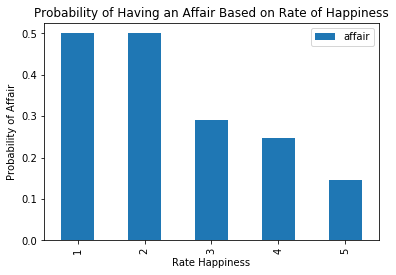

In [57]:
fig = plt.figure(figsize=(8,4))
temp2.plot(kind = 'bar')
plt.xlabel('Rate Happiness')
plt.ylabel('Probability of Affair')
plt.title("Probability of Having an Affair Based on Rate of Happiness")
plt.show()

# Splitting Data For Training and Testing

In [58]:
#Before you split data do these things:
#Check Null values (if null values exist - deal with them)
#Separate x and y (tell the computer what my x - feature vars, y is your target var)
#Encoding (be careful of ordinal - they would need order vs nominal variables which doesn't have order
#you would use one hot encoding to make sure they don't get mixed with ordinal encoding)


In [59]:
#Indexing to separate my data set into x and y
x = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values.ravel()

In [60]:
#80/20 split random state will keep your test    stratify will mimic the distr of y
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=0, stratify=y)

In [61]:
#Resampling
#to handle the imbalance in 0's and 1's in the target var 'affair'
update_y = SMOTE(random_state=0, ratio = 1.0)
update_x_train, update_y_train = update_y.fit_sample(x_train, y_train)

/Users/sheilatupker/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [62]:
#now the data is more balanced
print (np.bincount(update_y_train))
#now everything is check to go into our models
#we do not need standardization for decision trees because it is robust to numerical instability
#and it doesn't use any distance calculation

[360 360]


Modeling Function:




In [63]:
#Classification:
#This is a classification problem. We are trying to classify the data according to whether or not an instance had an affair.

#defining a function called classification_model that has the parameters - model, x_train, x_test, y_train,y_test

#model = is DecisionTreeClassifer(), RandomForestClassifier(), LogisticRegression()

#data = (data = pd.read_csv('/Users/sheilatupker/Desktop/BigDataProject/affairs.csv'))

#predictors = ['sex', 'age', 'ym', 'child', 'religious', 'education','occupation','rate'] any single or combo of the group(x)

#outcome = 'affair' 0 no affair or 1 for affair (y)

In [64]:
def classification_model(model, x_train, x_test, y_train, y_test):
    #This is the learning stage of the algorithm - it is called "Fitting the Model"
    #As parameters it takes in training predictors and outcome
    model.fit(x_train, y_train)
    
    #Make predictions on testing set:
    predictions = model.predict(x_test)
    
    #dot format so put whatever the accuracy is inside of the curly braces.
    #then apply 3 decimal places
    #then sub this in for %s and voila
    print('Train Accuracy: {0:.3%}'.format(metrics.accuracy_score(y_train, model.predict(x_train))))
    print('Test Accuracy: {0:.3%}'.format(metrics.accuracy_score(y_test, predictions)))
    
    #calculate precision, recall, and fscore
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average='micro')
    print('Fscore: ', fscore)
    
    #Classification Report
    print(classification_report(y_test, predictions))
    
    #cross validation to check for over fitting
    #creating a variable, kf, for the constructor of the built in object KFOLD()
    kf = model_selection.KFold(n_splits=6, random_state = 0)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(model, x_train, y_train, cv=kf, scoring=scoring)
    print("6-fold cross validation average accuracy: %2f (+/- %0.2f)"%(results.mean(), results.std()*2))
    
    
    
    

In [65]:
#Decision Tree

In [66]:
#Rhis provides a decision tree boundary for how the data is separated.
#example: categorizing animal species - does it produce milk or not
#if it is not producing then stop bc its something other than mammal
#if it is producing milk then keep going bc it is a mammal
#next you might ask does it have feathers
#the end result will show on all of your edges and should be each of your variables
#you should be able to classify something based on how it performs in the decision tree
#for example: Are you happy in your relationship?  How many years married?
#so its going to learn the most important variables and put them in the decision ranked by importance
#and let you know this is likely for an affair - yes.



model = DecisionTreeClassifier(random_state=0)
classification_model(model, update_x_train, x_test, update_y_train, y_test)

Train Accuracy: 99.444%
Test Accuracy: 62.810%
Fscore:  0.628099173553719
             precision    recall  f1-score   support

          0       0.79      0.69      0.74        91
          1       0.32      0.43      0.37        30

avg / total       0.67      0.63      0.64       121

6-fold cross validation average accuracy: 0.758333 (+/- 0.27)


In [67]:

#Train accuracy is like a review for a math exam - you know the answers and can work it perfectly or close to perfect
#Test accuracy is your actual math exam without knowing the questions or the answers - its the real test for how well you learned the material.
#The training is saying we correctly predicted 99.4 of whether there was an affair or not
#But the testing set (which has not seen the outcomes) is low so bravada and over
#fitting and the algorithm could do better (the lower the differnce between train and test
#accuracy the lower the bias and the better the algorithm)
#You can also see that there is overfitting via crossvalidation (checking
#for minimal bias) being 76% compared to 99.4. 

#cross validation of 76% says it could be better (but its good) and you need to compare
#to compare it to the train accuracy - which also tells me there is overfitting.

#accuracy - tells me how well the model did 
#training accuracy - from the training set of x values it predicts the 
#training of y values. The model learns on this data. It sees both the
#predicitive var and the target variable and this is how it learns.

#the testing accuracy is how accurate is the model at predicting y values 
#of the testing set. The testing sees the predictive areas but not the outcomes (y the target var)
#in the testing set. This algorithm is letting me know how the testing algorithm

#double check with cross validation - it gives us another measure on
#how well our algorithm has done on overfitting or underfitting
#The cross validation was done on 6 fold so it ran six times and this is an average of those runs.

#model.tree lets you look at the var inside your decision tree classifier that defines my entire tree
#node_count tells me how many nodes are in my tree
model.tree_.node_count


337

In [68]:
#How CAN WE MAKE THIS MODEL BETTER
# I would like a higher cross-validation score
# 98.669 is much higher than 59.708 which leads me to believe there is over-fitting
# I can tweak the 'criterion parameters'
# maxLeaveNodes - 100 tweaking paramaters of model I am feeding into this modeling function
#TRAIN TEST SPLIT AND CROSS VALIDATION 
model = DecisionTreeClassifier(max_leaf_nodes = 100)
classification_model(model, update_x_train, x_test, update_y_train, y_test)


Train Accuracy: 95.000%
Test Accuracy: 66.942%
Fscore:  0.6694214876033058
             precision    recall  f1-score   support

          0       0.78      0.78      0.78        91
          1       0.33      0.33      0.33        30

avg / total       0.67      0.67      0.67       121

6-fold cross validation average accuracy: 0.761111 (+/- 0.19)


In [69]:
# I would like a higher cross-validation score
# I feel that 91.348 is so much higher than 61.212 which leads me to believe there is possibly over-fitting
# I can tweak - criterion parameters
#maxLeaveNodes - 10
model = DecisionTreeClassifier(max_leaf_nodes = 10)
classification_model(model, update_x_train, x_test, update_y_train, y_test)


Train Accuracy: 79.583%
Test Accuracy: 67.769%
Fscore:  0.6776859504132231
             precision    recall  f1-score   support

          0       0.79      0.78      0.78        91
          1       0.35      0.37      0.36        30

avg / total       0.68      0.68      0.68       121

6-fold cross validation average accuracy: 0.713889 (+/- 0.14)


In [70]:
# more tweaking - max_depth = 3
model = DecisionTreeClassifier(max_leaf_nodes = 10, max_depth = 3)
classification_model(model, update_x_train, x_test, update_y_train, y_test)


Train Accuracy: 78.750%
Test Accuracy: 71.074%
Fscore:  0.7107438016528925
             precision    recall  f1-score   support

          0       0.83      0.78      0.80        91
          1       0.43      0.50      0.46        30

avg / total       0.73      0.71      0.72       121

6-fold cross validation average accuracy: 0.641667 (+/- 0.24)


In [71]:
# find out how each variable weighed in
model.feature_importances_

array([0.        , 0.03848232, 0.01926656, 0.        , 0.24153611,
       0.01391431, 0.        , 0.6868007 ])

In [72]:
# more tweaking - taking out sex and ym
# predictor vars - everything but affair and nbraffair
# model same as above
sub_update_x_train = update_x_train[:, [1,3,4,5,7]]
sub_x_test = x_test[:,[1,3,4,5,7]]
classification_model(model, sub_update_x_train, sub_x_test, update_y_train, y_test)


Train Accuracy: 78.750%
Test Accuracy: 71.901%
Fscore:  0.7190082644628101
             precision    recall  f1-score   support

          0       0.83      0.79      0.81        91
          1       0.44      0.50      0.47        30

avg / total       0.73      0.72      0.72       121

6-fold cross validation average accuracy: 0.656944 (+/- 0.26)


In [73]:
# more tweaking - try top three vars only
# model same as above
sub_update_x_train = update_x_train[:,[1,4,7]]
sub_x_test = x_test[:,[1,4,7]]
classification_model(model, sub_update_x_train, sub_x_test, update_y_train, y_test)


Train Accuracy: 78.750%
Test Accuracy: 71.901%
Fscore:  0.7190082644628101
             precision    recall  f1-score   support

          0       0.83      0.79      0.81        91
          1       0.44      0.50      0.47        30

avg / total       0.73      0.72      0.72       121

6-fold cross validation average accuracy: 0.686111 (+/- 0.17)


In [74]:
# more tweaking - try top three vars only and not specify max_depth
model = DecisionTreeClassifier(max_leaf_nodes = 10)
#same variables as before
classification_model(model, sub_update_x_train, sub_x_test, update_y_train, y_test)


Train Accuracy: 78.056%
Test Accuracy: 71.074%
Fscore:  0.7107438016528925
             precision    recall  f1-score   support

          0       0.79      0.85      0.81        91
          1       0.39      0.30      0.34        30

avg / total       0.69      0.71      0.70       121

6-fold cross validation average accuracy: 0.727778 (+/- 0.13)


In [75]:
#This is a better model then the first one.
#The Goal = testing accuracy to be high but also close to training accuracy because that is what
#tells us about the bias. 
#Ideally want cross validation to be in a similar nbrs to the testing(and in close range to training)

In [76]:
#SECOND TECHNIQUE
#Random Forest:

In [77]:
# random forest takes a number of decision trees and averages them together
# so it is more accurate of the overall picture than a decision tree

rc_classifier = RandomForestClassifier(random_state=0)

In [78]:
# Feature Importance Selection:

In [79]:
#train the model - train on my trainin sets that have been over sampled
rc_classifier.fit(update_x_train, update_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [80]:
# find out how which features are more important to the model
rc_rank = rc_classifier.feature_importances_

# place this into an array
rc_array = pd.Series(rc_rank, data.columns[:-1])

#sorting it in Desc and inplace resaves it as a feature_array
rc_array.sort_values(ascending = False, inplace = True)
print(rc_array)

rate          0.215030
religious     0.160544
education     0.135916
age           0.126188
occupation    0.123516
ym            0.103809
child         0.079151
sex           0.055846
dtype: float64


In [81]:
# Feature selection - evaluate most significant features for random forest
# classifier - this takes the topic one feature and runs the random forest
# and calculates an fscore, repeat this process with the n-1 feature.
# This tells me how many features will give you the best fscore.
# using random forest for feature selection

rf_importances = []
fscores = []

# enter columns by order of importance
f_cols = [7,4,5,1,6,2,3,0]

# going to do this 10 times by each time creating 25 different trees
for k in range(1,10):
    #declare model
    rfc = RandomForestClassifier(random_state=0, n_estimators=25)
    
    # train model
    rfc.fit(update_x_train[:,f_cols[0:k]], update_y_train)
    
    # get feature importances
    importances = rfc.feature_importances_.tolist()
    
    # test model
    y_pred = rfc.predict(x_test[:, f_cols[0:k]])
    
    # Get precision, recall, fscore, and support
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
    rf_importances.append(importances)
    fscores.append(fscore)


In [82]:
print('Fscores: ', fscores)
# fscores - measure of accuracy
# the top two have the same importance, the top four have the highest f score which means to work with
# the topc four variables which are: rate, religious, education, and age

Fscores:  [0.7272727272727273, 0.7024793388429752, 0.7107438016528925, 0.7603305785123967, 0.7438016528925621, 0.7438016528925621, 0.7603305785123967, 0.7024793388429752, 0.7024793388429752]


In [83]:
# model for random forest
# first we will use all variables
model = RandomForestClassifier(random_state=0)
classification_model(model, update_x_train, x_test, update_y_train, y_test)


Train Accuracy: 98.472%
Test Accuracy: 73.554%
Fscore:  0.7355371900826446
             precision    recall  f1-score   support

          0       0.78      0.90      0.84        91
          1       0.44      0.23      0.30        30

avg / total       0.70      0.74      0.70       121

6-fold cross validation average accuracy: 0.818056 (+/- 0.21)


In [84]:
#a subset of the data taken from our feature importances
# using the top 4 attributes we learned from above
sub_update_x_train = update_x_train[:, [1,4,5,7]]
sub_x_test = x_test[:,[1,4,5,7]]

In [85]:
# model for random forest
# second will use only the top 4 vars
classification_model(model, sub_update_x_train, sub_x_test, update_y_train, y_test)


Train Accuracy: 92.917%
Test Accuracy: 74.380%
Fscore:  0.7438016528925621
             precision    recall  f1-score   support

          0       0.80      0.88      0.84        91
          1       0.48      0.33      0.39        30

avg / total       0.72      0.74      0.73       121

6-fold cross validation average accuracy: 0.777778 (+/- 0.22)


In [86]:
#Logistic Regression:

# logistic regression 
Notes to self:
Plot data on x and y with data points.
]I want to find a statisitcal model that describes the relationship between x and y.
equation for a line.
y = mx+b
put some values in for m and b then they see how good a fit it is.
If it is not a good then look at the errors and make a new line
y = m1xb1 with new line
Is it a better fit?
It will keep iterating until it gets to the smallest possible error

The general idea of regression is you have some mathematical equation where you try ton do the prediction and you try to keep erros down and keep going until you get a min error.

Logistic Regression is using the logistic equation instead of the linear equation.

In [87]:
# penalty - keeps from overfitting
# c - helps balance out data
# random_state for data consistency
# initiated model
model = LogisticRegression(penalty='l2', C=1.0, random_state=0)
classification_model(model, update_x_train, x_test, update_y_train, y_test)


Train Accuracy: 67.917%
Test Accuracy: 66.116%
Fscore:  0.6611570247933884
             precision    recall  f1-score   support

          0       0.86      0.66      0.75        91
          1       0.39      0.67      0.49        30

avg / total       0.74      0.66      0.68       121

6-fold cross validation average accuracy: 0.563889 (+/- 0.11)


In [88]:
# logistic regression with top four
# same model as before
classification_model(model, sub_update_x_train, sub_x_test, update_y_train, y_test)


Train Accuracy: 63.750%
Test Accuracy: 64.463%
Fscore:  0.6446280991735537
             precision    recall  f1-score   support

          0       0.84      0.65      0.73        91
          1       0.37      0.63      0.47        30

avg / total       0.73      0.64      0.67       121

6-fold cross validation average accuracy: 0.504167 (+/- 0.22)


# What was learned:

#cell 199 - random forest had the greatest accuracy but there is still some bias that could be managed. I made some changes with feature importances to reduce some of the bias. Now I know I could have also done hyper-paramterization which would have changed the parameters.
Train Accuracy: 92.917%
Test Accuracy: 74.380%
Fscore:  0.7438016528925621



